In [15]:
import pandas as pd
df=pd.read_csv('BreastCancer.csv')
import numpy as np
import warnings

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  699 non-null    int64 
 1   Clump               699 non-null    int64 
 2   CellSize            699 non-null    int64 
 3   CellShape           699 non-null    int64 
 4   MarginalAdhesion    699 non-null    int64 
 5   EpithelialCellSize  699 non-null    int64 
 6   BareNuc             699 non-null    object
 7   BlandChromatin      699 non-null    int64 
 8   NormalNucleoli      699 non-null    int64 
 9   Mitoses             699 non-null    int64 
 10  Class               699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [17]:
df.replace('?', np.nan, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  699 non-null    int64 
 1   Clump               699 non-null    int64 
 2   CellSize            699 non-null    int64 
 3   CellShape           699 non-null    int64 
 4   MarginalAdhesion    699 non-null    int64 
 5   EpithelialCellSize  699 non-null    int64 
 6   BareNuc             683 non-null    object
 7   BlandChromatin      699 non-null    int64 
 8   NormalNucleoli      699 non-null    int64 
 9   Mitoses             699 non-null    int64 
 10  Class               699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [21]:
from sklearn.impute import SimpleImputer
# Replace missing values with the median of the column
imputer = SimpleImputer(strategy='median')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  699 non-null    float64
 1   Clump               699 non-null    float64
 2   CellSize            699 non-null    float64
 3   CellShape           699 non-null    float64
 4   MarginalAdhesion    699 non-null    float64
 5   EpithelialCellSize  699 non-null    float64
 6   BareNuc             699 non-null    float64
 7   BlandChromatin      699 non-null    float64
 8   NormalNucleoli      699 non-null    float64
 9   Mitoses             699 non-null    float64
 10  Class               699 non-null    float64
dtypes: float64(11)
memory usage: 60.2 KB


In [22]:
df.isnull().sum()

id                    0
Clump                 0
CellSize              0
CellShape             0
MarginalAdhesion      0
EpithelialCellSize    0
BareNuc               0
BlandChromatin        0
NormalNucleoli        0
Mitoses               0
Class                 0
dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [24]:
import numpy as np

In [25]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
label_mapping={2:0,4:1}
y_label=[label_mapping[i] for i in y]
y=np.array(y_label)

In [26]:
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
svm_model=SVC(kernel='linear',gamma='auto',random_state=42)
svm_model.fit(X_train,y_train)

SVC(gamma='auto', kernel='linear', random_state=42)

In [28]:
X_train_svm=svm_model.predict(X_train)
X_test_svm=svm_model.predict(X_test)
X_train_combined=np.hstack((X_train,X_train_svm.reshape(-1,1)))
X_test_combined=np.hstack((X_test,X_test_svm.reshape(-1,1)))


In [29]:
ann_model = Sequential([
    Dense(16, input_shape=(X_train_combined.shape[1],), activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
ann_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = ann_model.fit(X_train_combined, y_train, epochs=50, batch_size=10, validation_split=0.2, verbose=1)




Epoch 1/50


40/40 [==============================] - 2s 15ms/step - loss: 0.5854 - accuracy: 0.7289 - val_loss: 0.4537 - val_accuracy: 0.9388
Epoch 2/50
40/40 [==============================] - 0s 6ms/step - loss: 0.3558 - accuracy: 0.9616 - val_loss: 0.2932 - val_accuracy: 0.9388
Epoch 3/50
40/40 [==============================] - 0s 5ms/step - loss: 0.2223 - accuracy: 0.9616 - val_loss: 0.2094 - val_accuracy: 0.9388
Epoch 4/50
40/40 [==============================] - 0s 5ms/step - loss: 0.1535 - accuracy: 0.9642 - val_loss: 0.1702 - val_accuracy: 0.9388
Epoch 5/50
40/40 [==============================] - 0s 6ms/step - loss: 0.1196 - accuracy: 0.9693 - val_loss: 0.1534 - val_accuracy: 0.9388
Epoch 6/50
40/40 [==============================] - 0s 5ms/step - loss: 0.1030 - accuracy: 0.9693 - val_loss: 0.1459 - val_accuracy: 0.9388
Epoch 7/50
40/40 [==============================] - 0s 5ms/step - loss: 0.0941 - accuracy: 0.9693 - val_loss: 0.1424 - val_accuracy: 0.9388
Epoch 8/50
40/40

In [30]:
loss, accuracy = ann_model.evaluate(X_test_combined, y_test, verbose=0)
y_pred_proba = ann_model.predict(X_test_combined)
y_pred = (y_pred_proba > 0.5).astype(int)
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print(cr)

7/7 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       143
           1       0.94      0.96      0.95        67

    accuracy                           0.97       210
   macro avg       0.96      0.96      0.96       210
weighted avg       0.97      0.97      0.97       210



<AxesSubplot:>

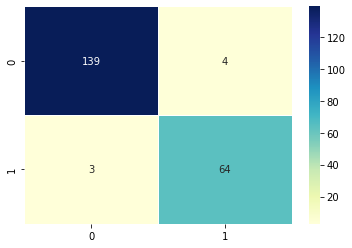

In [31]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="",cmap='YlGnBu',linewidths=0.90)